In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
# Loading the data.
data = pd.read_csv('indian-liver-patient-records/data.csv')

In [92]:
# Checking out how the data looks.
data.tail(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
# Getting some global data of the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# Identifing those features which are null.
data.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


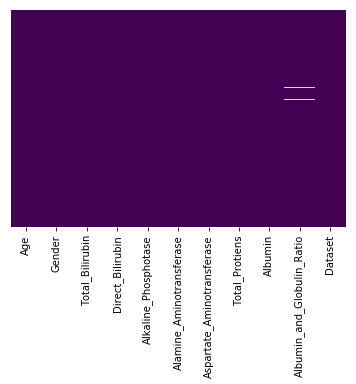

In [6]:
# We can actually check the null features better using a heatmap plot from seaborn library.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [16]:
# We only have four cases with NaN values in the Albumin_and_Globulin_Ratio column
tmp = data.isnull()
data[tmp[:]['Albumin_and_Globulin_Ratio'] == True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [35]:
# Since they are only four rows, we can drop those rows with 'NaN' valur in the Albumin_and_Globulin_Ratio column
labels = [209,241,253,312]
data.drop(labels,axis=0,inplace=True)

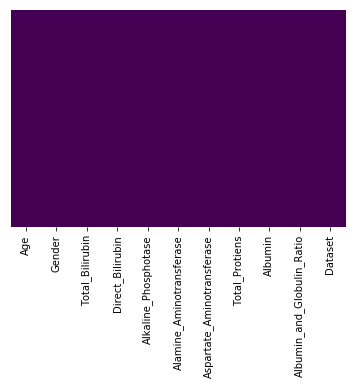

In [36]:
# Plotting the heatmap again. Just in case.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [37]:
# Setting a specific style for the graphs.
sns.set_style('whitegrid')

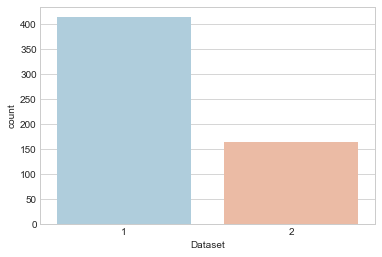

In [38]:
# Plotting the amount of sick and healthy examples we have in our data set.
sns.countplot(x='Dataset',data=data,palette='RdBu_r');

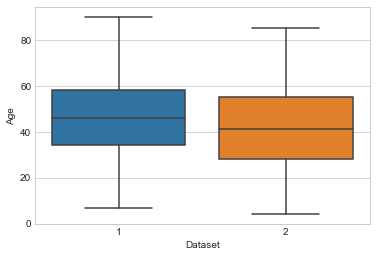

In [68]:
# Age looks like not being a really clear factor for liver disease.
sns.boxplot(x='Dataset',y='Age',data=data)

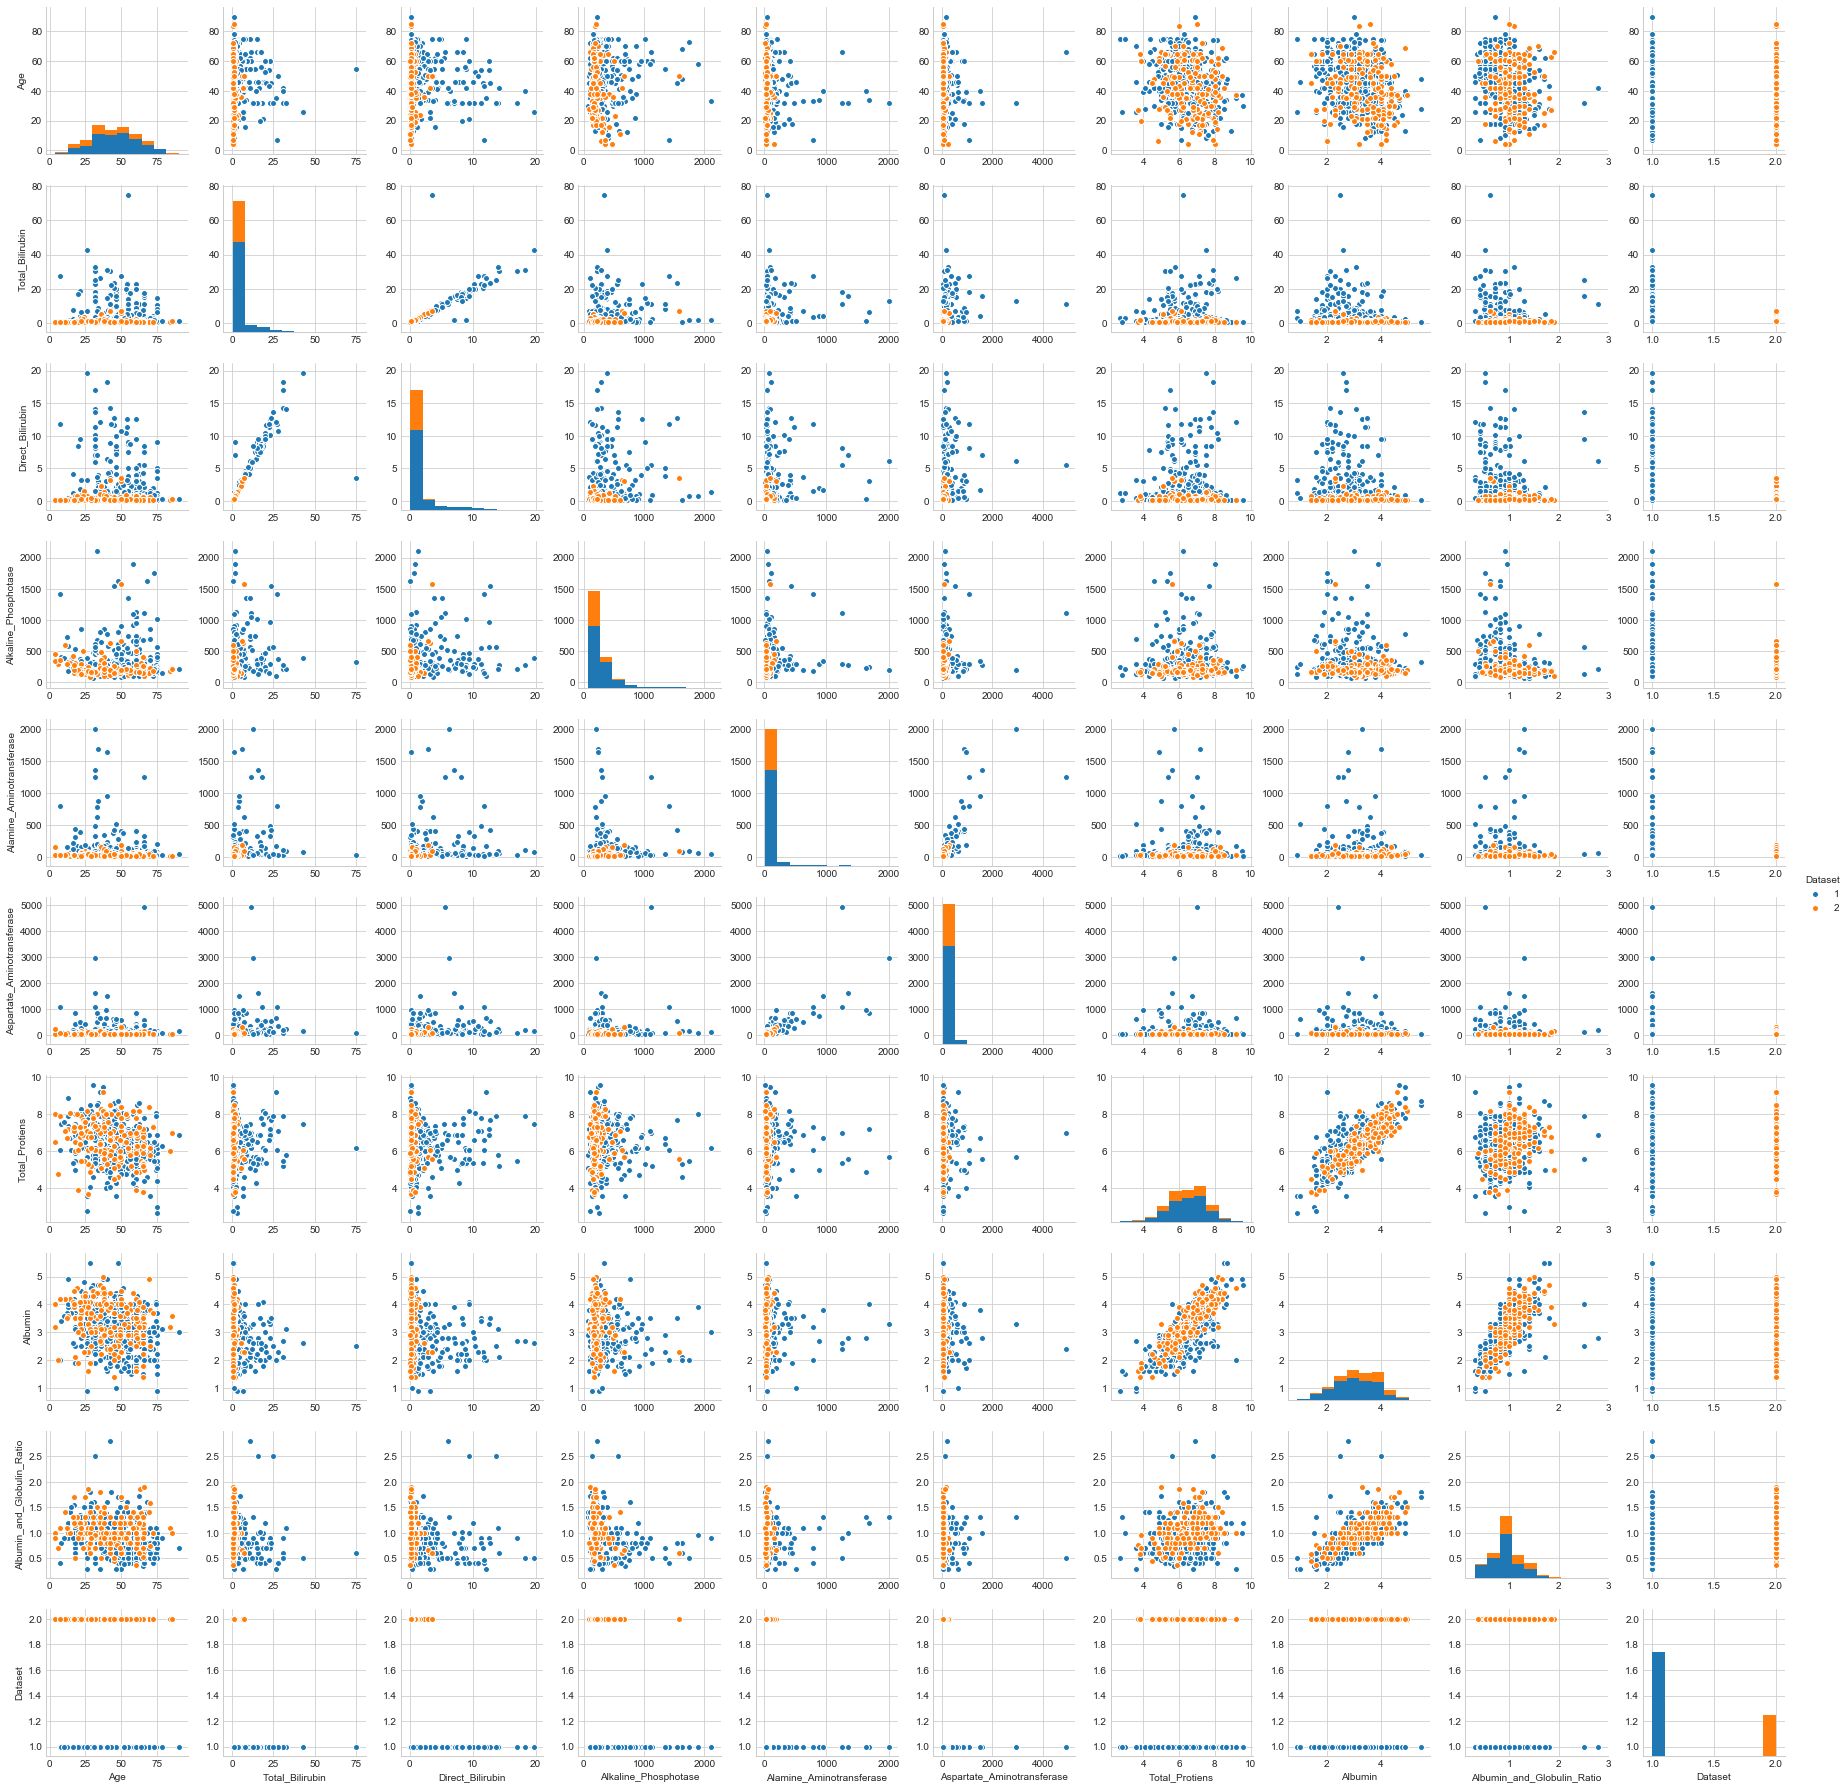

In [41]:
# Checking the distribution of the features and their correlation for healthy (orange) and unhealthy cases (blue).
sns.pairplot(data=data, hue='Dataset')

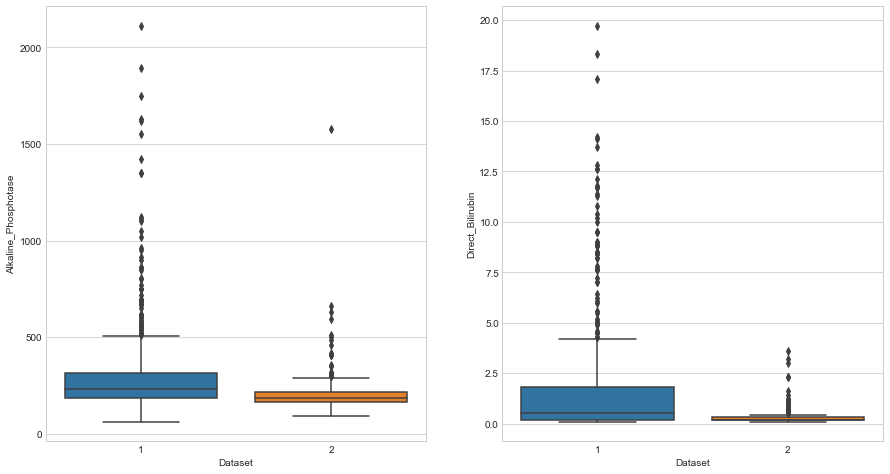

In [61]:
# It's observable some features tend to indicate no disease of the liver if it takes values close to 0, but the higher they
# become, the higher the probability of getting a liver disorder gets.
fig, ax = plt.subplots(figsize=(15,8), ncols=2, nrows=1)
sns.boxplot(x='Dataset',y='Alkaline_Phosphotase',data=data,ax=ax[0]);
sns.boxplot(x='Dataset',y='Direct_Bilirubin',data=data,ax=ax[1]);

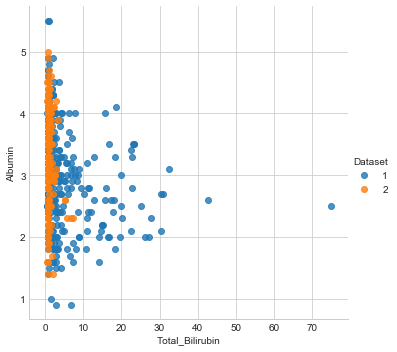

In [81]:
# Another case we can observe is that when one feature is not correlated with another one, then we will tend to be in front of
# a healthy liver. If both features are correlated, then we will tend to face an unhealthy liver.
sns.lmplot(x='Total_Bilirubin',y='Albumin',data=data,hue='Dataset',fit_reg=False);

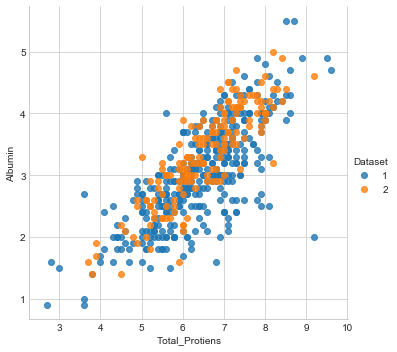

In [85]:
# Finally, in some cases two features are linearly correlated following some Gaussian distribution. When the values are more or
# less within a certain variance, we probably are facing a healthy liver. In the other case, when the correlation between both
# both features is too far from the variance distribution, then the liver has higher probabilities of having a disease.
sns.lmplot(x='Total_Protiens',y='Albumin',data=data,hue='Dataset',fit_reg=False);

In [86]:
# Since we want numerical data, we change the feature Gender values Male and Female for 0 and 1.
data.loc[data['Gender']=='Male','Gender'] = 0
data.loc[data['Gender']=='Female','Gender'] = 1

In [87]:
# Checking out the results.
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [88]:
# We also want the healthy cases be labeled as 0 and not as 2.
data.loc[data['Dataset']==2,'Dataset'] = 0

In [89]:
#Checking out the results.
data.tail(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,0,1.0,0.3,216,21,24,7.3,4.4,1.50,0
